# Classification

## Preprocessing script
Ensurees the data is ready for classification. Thsi script is takn directly from the preprocessing notebook. 

In [1]:
import pandas as pd
import numpy as np

print("Preprocessing and cleaning data...\n")
##Read excel spread sheet of data
data = pd.read_excel('cleaned_data.xls', header=0)

##Declare the column names
data.columns = ['date', 's_and_p_comp', 'dividend', 'earnings',
                'CPI', 'fraction_date', 'long_interest_rate', 'real_price',
                'real_dividend', 'real_total_return_price','real_earnings',
                'real_scaled_earnings', 'CAPE', 'TR_CAPE', 'excess_CAPE', 'montly_bond_return',
                'real_bond_return','10_year_stock_return', '10_year_bond_return',
                '10_year_excess_return']

##Replaces all 'NA' rows with NAN type
data = data.replace('NA',np.NaN)

data.head()

##Drop "10 year" columns so there are no rows with missing data after 2011
print("Dropping unfinished columns...")    
data = data.drop(['10_year_stock_return'],axis=1)
data = data.drop(['10_year_bond_return'],axis=1)
data = data.drop(['10_year_excess_return'],axis=1)

##Drop rows with missing data
print("Dropping unfinished rows...")
print('\n\nNumber of rows in original data = %d' % (data.shape[0]))
data = data.dropna()
print('Number of rows after discarding missing values = %d\n' % (data.shape[0]))

#Number
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

##Check to make sure there are no missing values in each column
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

print("\n\nPreprocessing done.")

Preprocessing and cleaning data...

Dropping unfinished columns...
Dropping unfinished rows...


Number of rows in original data = 1809
Number of rows after discarding missing values = 1686

Number of instances = 1686
Number of attributes = 17

Number of missing values:
	date: 0
	s_and_p_comp: 0
	dividend: 0
	earnings: 0
	CPI: 0
	fraction_date: 0
	long_interest_rate: 0
	real_price: 0
	real_dividend: 0
	real_total_return_price: 0
	real_earnings: 0
	real_scaled_earnings: 0
	CAPE: 0
	TR_CAPE: 0
	excess_CAPE: 0
	montly_bond_return: 0
	real_bond_return: 0


Preprocessing done.


## Decision Tree
### Encoding in a Binary Format
For this tree, we are going to format long_interest_rate column as an example. We have defined an interest rate > 7 to be high, and everything < 7 to be low.
For this example, -1 == Low and 1 == High

In [2]:
filterLow = data['long_interest_rate'] >= 7
filterHigh = data['long_interest_rate'] < 7

data['long_interest_rate'].where(filterLow, -1, inplace = True)
data['long_interest_rate'].where(filterHigh, 1, inplace = True)

Now, the decision tree only has to determine if long_interest_rate is low or high.
### Creating the Tree
To create this tree, we went with a depth of 4 becasue past that it was apparent that we ran into over-fitting. The classes are baed on the low/high of long_interest_rate since that is the obvious filter of upward/downard trending years.

In [19]:
from sklearn import tree

Y = data['long_interest_rate']
X = data.drop(['date','long_interest_rate'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf = clf.fit(X, Y)

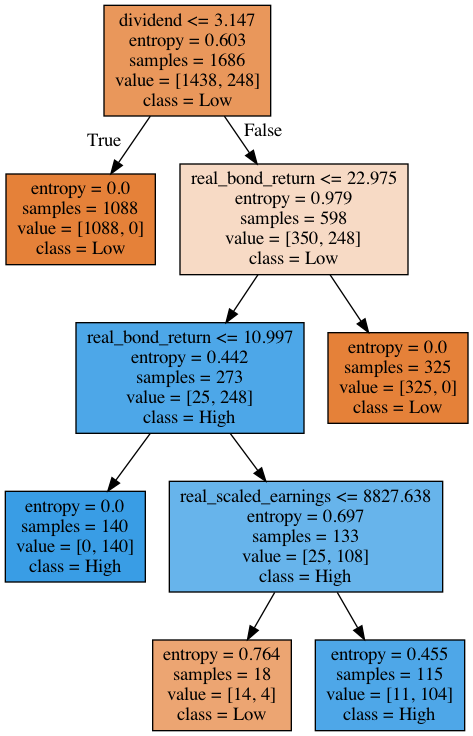

In [20]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['Low','High'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### Accuracy
To test the accuracy of the data, we run the following code.

In [21]:
from sklearn.metrics import accuracy_score

predY = clf.predict(X)
predictions = pd.concat([data['date'],pd.Series(predY,name='Predicted Class')], axis=1)
print('Accuracy on test data is %.2f' % (accuracy_score(Y, predY)))

Accuracy on test data is 0.99


### Summary
For classification, a descision tree is the most obvious choice for the data set we are working with. Because of the nature of finacial data, we looked for upward and downward trends, and years that did better than others. With this method, we got a very high accuracy without overfitting. From here, you would be able to look further into each classification to see more data and trends.